In [1]:
from tqdm import tqdm
import json
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [4]:
lines = ''
root_dir = '\\\\databrick\\N\\eve_logs'
#root_dir = "O:\\log_dir\\eve_miner"
with open(f"{root_dir}\\databrick_-m_2023-03-25_17-37-18_704880.log") as f:
    lines = f.readlines()

In [5]:
mining_class_lines = []
for line in tqdm(lines):
    if 'MiningBot.BotActions.Actions:mine_till_full_v2:' in line and ' - {' in line:
        index = line.find('{')
        mining_class_lines.append(json.loads(line[index:-1].replace("'", '"').replace('UUID("', '"').replace('")', '"').replace("True", '1').replace("False", '0')))

100%|█████████████████████████████████████████████████████████████████████| 764117/764117 [00:00<00:00, 3293528.31it/s]


In [6]:
len(mining_class_lines)

4992

In [7]:
mining_class_lines[0]

{'argmax_index': 4,
 'value_at_argmax': 0.99996686,
 'pass_general_tollerance': 1,
 'class': 'no_miners_running',
 'classes': ['both_running',
  'invalid',
  'miner_1_running',
  'miner_2_running',
  'no_miners_running'],
 'scores': [1.813492360724922e-07,
  3.7030116573077976e-07,
  3.2143128919415176e-05,
  4.220128460019623e-07,
  0.9999668598175049],
 'id': 'a00cc7e7-cb5e-11ed-bd61-9c5c8ec2126c',
 'model': 'mining_tool_state'}

In [8]:
df = pd.DataFrame(mining_class_lines)
df

,argmax_index,value_at_argmax,pass_general_tollerance,class,classes,scores,id,model
0,4,0.999967,1,no_miners_running,"[both_running, invalid, miner_1_running, miner...","[1.813492360724922e-07, 3.7030116573077976e-07...",a00cc7e7-cb5e-11ed-bd61-9c5c8ec2126c,mining_tool_state
1,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 9.080199547313204e-16, 7.40326633330568e...",bbcd451b-cb5e-11ed-9650-9c5c8ec2126c,mining_tool_state
2,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 7.937791917670344e-17, 1.149498052299691...",d10e91ea-cb5e-11ed-8077-9c5c8ec2126c,mining_tool_state
3,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 6.352989302890608e-17, 1.139566913055389...",e64b384a-cb5e-11ed-9984-9c5c8ec2126c,mining_tool_state
4,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 3.01420247700689e-17, 3.332676148937175e...",fb9164b0-cb5e-11ed-83ae-9c5c8ec2126c,mining_tool_state
...,...,...,...,...,...,...,...,...
4987,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 1.62827324105584e-19, 1.840576649425607e...",5e24c5b9-ce86-11ed-9025-9c5c8ec2126c,mining_tool_state
4988,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 1.966359896885797e-18, 7.788943968967121...",7393cdf7-ce86-11ed-96bd-9c5c8ec2126c,mining_tool_state
4989,2,1.000000,1,miner_1_running,"[both_running, invalid, miner_1_running, miner...","[4.2555754475870344e-09, 5.2037736776979274e-1...",89090798-ce86-11ed-961d-9c5c8ec2126c,mining_tool_state
4990,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 3.7703285230957964e-18, 8.88439433133214...",a3582b77-ce86-11ed-8d48-9c5c8ec2126c,mining_tool_state


In [9]:
df = df.sort_values(by='value_at_argmax', ascending=True).reset_index()
del df['index']
df[0:20]

,argmax_index,value_at_argmax,pass_general_tollerance,class,classes,scores,id,model
0,0,0.676779,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.6767789125442505, 1.7806840257959117e-13, 1...",690e5e6a-cbda-11ed-9a86-9c5c8ec2126c,mining_tool_state
1,4,0.978404,1,no_miners_running,"[both_running, invalid, miner_1_running, miner...","[0.0005313626606948674, 0.0005863944534212351,...",77af7f7b-cdea-11ed-9414-9c5c8ec2126c,mining_tool_state
2,4,0.978412,1,no_miners_running,"[both_running, invalid, miner_1_running, miner...","[0.0005316276219673455, 0.0005862547550350428,...",cd19bfe2-cdea-11ed-9220-9c5c8ec2126c,mining_tool_state
3,4,0.978412,1,no_miners_running,"[both_running, invalid, miner_1_running, miner...","[0.0005316276219673455, 0.0005862547550350428,...",e270656c-cdea-11ed-ae87-9c5c8ec2126c,mining_tool_state
4,4,0.978412,1,no_miners_running,"[both_running, invalid, miner_1_running, miner...","[0.0005316276219673455, 0.0005862547550350428,...",8d22131a-cdea-11ed-b879-9c5c8ec2126c,mining_tool_state
5,4,0.978412,1,no_miners_running,"[both_running, invalid, miner_1_running, miner...","[0.0005316276219673455, 0.0005862547550350428,...",a272f00a-cdea-11ed-aa06-9c5c8ec2126c,mining_tool_state
6,4,0.978412,1,no_miners_running,"[both_running, invalid, miner_1_running, miner...","[0.0005316276219673455, 0.0005862547550350428,...",b7c7c6a0-cdea-11ed-be95-9c5c8ec2126c,mining_tool_state
7,0,0.990266,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9902661442756653, 4.447197818335802e-12, 0....",87a00759-ccc0-11ed-a5db-9c5c8ec2126c,mining_tool_state
8,0,0.994612,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9946120977401733, 0.00017893184849526733, 0...",53629178-cd60-11ed-bea1-9c5c8ec2126c,mining_tool_state
9,0,0.995460,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9954600930213928, 5.796852147604836e-12, 0....",f925bfcd-ce61-11ed-a718-9c5c8ec2126c,mining_tool_state


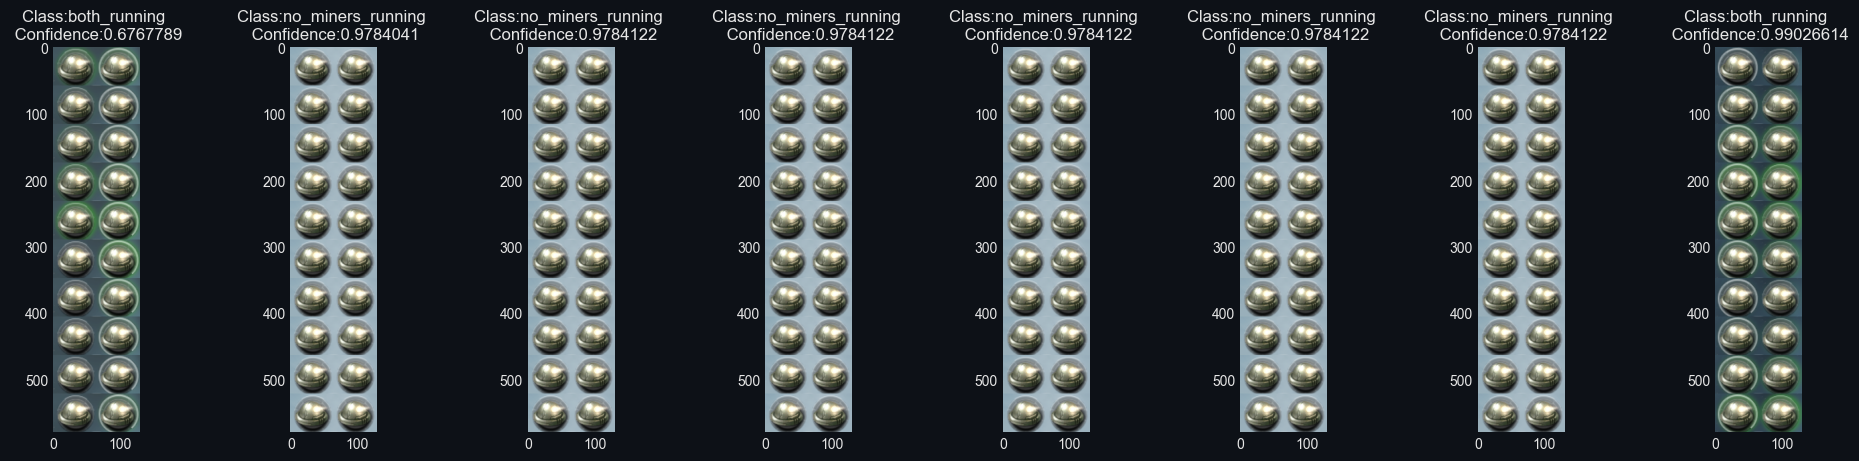

In [10]:
n_cols = 8
n_rows = 1
cell_with_dim = 3
cell_height_dim = 5

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))
for i, x in enumerate(df[0:n_cols].index):
    im = Image.open(f"{root_dir}\\images\\{df.loc[i, 'id']}.png")
    ax[x].grid(False)
    ax[x].set_title(f"Class:{df.loc[i, 'class']} \n Confidence:{df.loc[i, 'value_at_argmax']}")
    ax[x].imshow(im)

<Axes: xlabel='value_at_argmax', ylabel='Percent'>

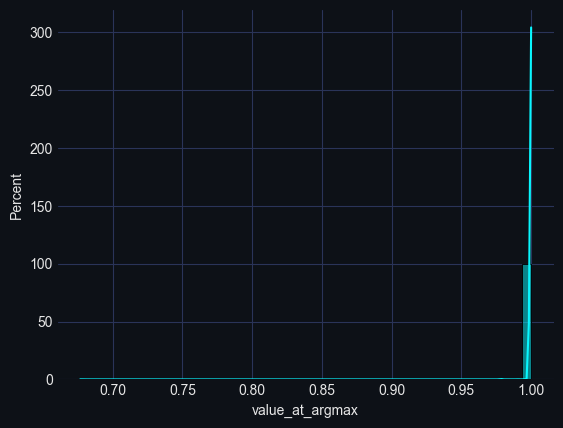

In [11]:
sns.histplot(data=df, x="value_at_argmax", kde=True, bins=50, stat="percent")

In [12]:
low_performing_list = df[df['value_at_argmax'] < 0.99]['id'].tolist()
low_performing_list

['690e5e6a-cbda-11ed-9a86-9c5c8ec2126c',
 '77af7f7b-cdea-11ed-9414-9c5c8ec2126c',
 'cd19bfe2-cdea-11ed-9220-9c5c8ec2126c',
 'e270656c-cdea-11ed-ae87-9c5c8ec2126c',
 '8d22131a-cdea-11ed-b879-9c5c8ec2126c',
 'a272f00a-cdea-11ed-aa06-9c5c8ec2126c',
 'b7c7c6a0-cdea-11ed-be95-9c5c8ec2126c']

In [14]:
import shutil
for item in low_performing_list:
    shutil.copy(f"{root_dir}\\images\\{item}.png", f"O:\\source\\repos\\EVE-Online-Bot\\training_data\\unclass\\{item}.png")